# Project 9: A Data Analysis of Your Own
By Arham Khan

For my personal analysis, I explored the weather conditions in four cities: Los Angeles, Islamabad, Delhi and Seattle. South Asia has some of the worst air quality, particularly Delhi, which led me to this topic (and picking 2 South Asian capital cities to compare with 2 US cities). My objective was to compare their temperature and humidity, and provide insights into their climatic variations. I see this information being useful to a large audience, for someone conducting climate research, studying urban environment or just planning to travel!

Data Source:
This data was obtained from the free OpenWeatherAPI, which provides current weather information on cities around the world. 
You can find out more or get your own key at: https://openweathermap.org/

Data Wrangling:
The data given by the API included different weather parameters. I focused on the average temperature, maximum temperature, minimum temperature and humidity.
The temperatures were given in Kelvin by default, so I converted them to Celsius for better readability. Next, this information was extracted and structured into a pandas datafame.

In [42]:
#import packages and libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
apiKey = 'e8b8d3a6dbd0f65ee27cc77de38c88ab'
apiURL = 'https://api.openweathermap.org/data/2.5/'
cities = ['Los Angeles', 'Islamabad', 'Delhi', 'Seattle']

In [50]:
def fetchWeather(city):
    url = f'{apiURL}weather?q={city}&appid={apiKey}'
    response = requests.get(url)
    data = response.json()  # Corrected here: Added parentheses to call the method
    return data

weatherData = {}
for city in cities:
    weatherData[city] = fetchWeather(city)


Response for Los Angeles: {'coord': {'lon': -118.2437, 'lat': 34.0522}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 288.26, 'feels_like': 288.15, 'temp_min': 286.87, 'temp_max': 289.5, 'pressure': 1015, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 130}, 'clouds': {'all': 100}, 'dt': 1703086908, 'sys': {'type': 1, 'id': 3694, 'country': 'US', 'sunrise': 1703084045, 'sunset': 1703119617}, 'timezone': -28800, 'id': 5368361, 'name': 'Los Angeles', 'cod': 200}
Response for Islamabad: {'coord': {'lon': 73.1338, 'lat': 33.7104}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.95, 'feels_like': 285.72, 'temp_min': 286.95, 'temp_max': 286.95, 'pressure': 1018, 'humidity': 51, 'sea_level': 1018, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 1.33, 'deg': 337, 'gust': 1.46}, 'clouds': {'all': 100}, 'dt': 1

In [71]:
def extractData(weatherData):
    extractedData = []
    for city, data in weatherData.items():
        if 'main' in data:
            temp = data['main']['temp'] - 273.15  # Convert from Kelvin to Celsius
            minTemp = data['main']['temp_min'] - 273.15
            maxTemp = data['main']['temp_max'] - 273.15
            humidity = data['main']['humidity']
            description = data['weather'][0]['description']
            extractedData.append({
                'City': city, 
                'Temperature': temp, 
                'Temp_Min': minTemp, 
                'Temp_Max': maxTemp, 
                'Humidity': humidity, 
                'Description': description
            })
        else:
            print(f"Data for {city} is not in the expected format")
    return pd.DataFrame(extractedData)

df = extractData(weatherData)
print(df)


          City  Temperature  Temp_Min  Temp_Max  Humidity      Description
0  Los Angeles        15.11     13.72     16.35        89             mist
1    Islamabad        13.80     13.80     13.80        51  overcast clouds
2        Delhi        15.05     15.05     15.05        72             haze
3      Seattle         5.12      2.25      8.15        94             mist


Analysis:
After extracting data using Python's 'requests' library to fetch data from the API, the JSON response was tranformed into a dataframe, and then the data was visualized using bar charts to compare the temparate and humidity. The temperature range was was also visualized.

The following bar chart shows the average temperature in each city, highlighting the warmer climates of LA and Delhi compared to Seattle.

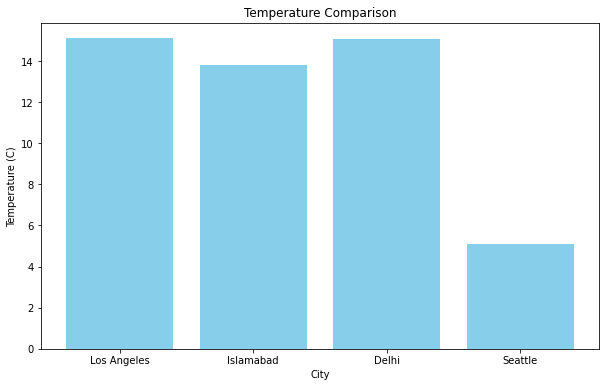

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(df['City'], df['Temperature'], color='skyblue')
plt.title('Temperature Comparison')
plt.xlabel('City')
plt.ylabel('Temperature (C)')
plt.show()

This following graph compares the humidity levels, showing a relatively lower humidity in Islamabad and Delhi.

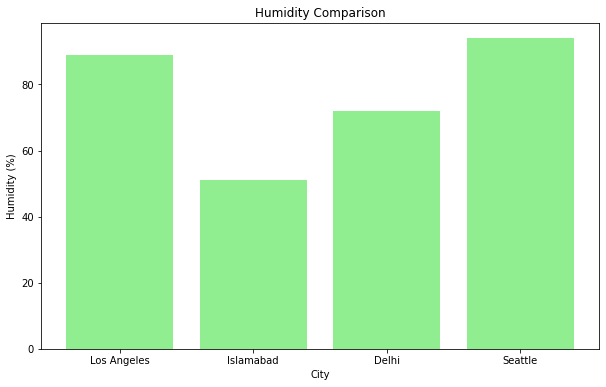

In [72]:
plt.figure(figsize=(10, 6))
plt.bar(df['City'], df['Humidity'], color='lightgreen')
plt.title('Humidity Comparison')
plt.xlabel('City')
plt.ylabel('Humidity (%)')
plt.show()

This visualization depicts the daily temperature variation in each city

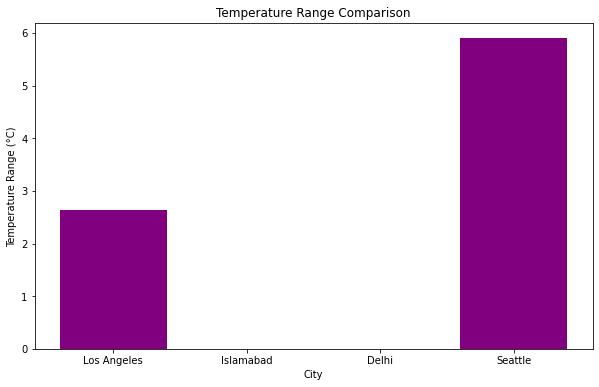

In [68]:
# Calculate the temperature range
df['Temp_Range'] = df['Temp_Max'] - df['Temp_Min']

# Plotting the temperature range
plt.figure(figsize=(10, 6))
plt.bar(df['City'], df['Temp_Range'], color='purple')
plt.title('Temperature Range Comparison')
plt.xlabel('City')
plt.ylabel('Temperature Range (°C)')
plt.show()

Here we have a dual plot, showing averagr temperature and humidity comparison:

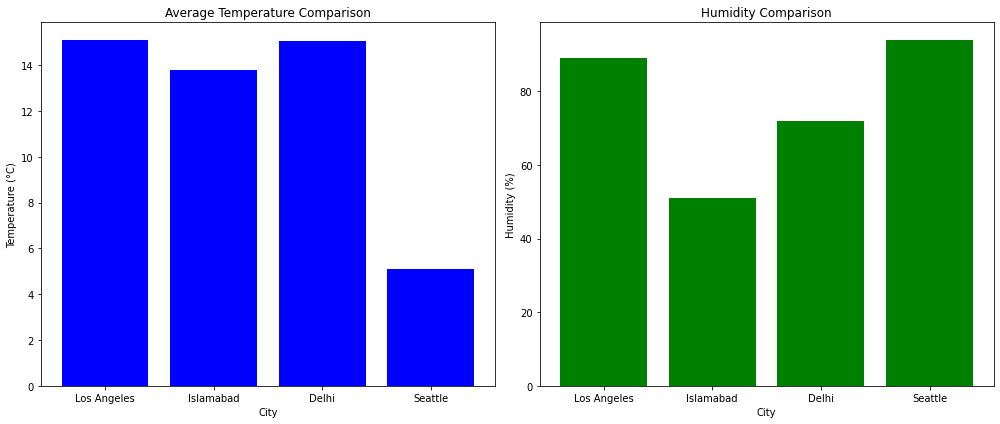

In [73]:
# Plotting average temperature and humidity
plt.figure(figsize=(14, 6))

# Temperature plot
plt.subplot(1, 2, 1)
plt.bar(df['City'], df['Temperature'], color='blue')
plt.title('Average Temperature Comparison')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')

# Humidity plot
plt.subplot(1, 2, 2)
plt.bar(df['City'], df['Humidity'], color='green')
plt.title('Humidity Comparison')
plt.xlabel('City')
plt.ylabel('Humidity (%)')

plt.tight_layout()
plt.show()


Some key findings and insights I found:
- Los Angeles and Seattle show higher temperature ranges, indicating significant variation between day and night temperatures. This makes sense knowing they are coastal cities.
- Islamabad and Delhi have similar low humidity levels, but Delhi has a relatively higher temperature.
- Seattle shows the lowest temperatures among all 4 cities, which is consistent with its climatic zone.

This analysis provides a snapshot of different weather parameters across four diverse cities. Such insights can be valuable for various applications, from urban planning to tourism. I think this has potential for more analysis, such as:
- Analyzing extended time period data, or observing seasonal variations
- Factoring in additional parameters like wind speed or air quality
- Going beyond these 4 cities and comparing them to other places around the world, which could help us see trends in global weather patterns.



# Above and Beyond: Comparison with Air Quality data

Here, I chose to integrate my weather data by exploring the relationship between weather conditions (temperature and humidity) and air quality in the same  cities.
First, I fetched air quality data from the World Air Quality Index API. Then I combined the data and performed a comparative analysis shown below:

In [74]:
aqiAPIKey = 'f9adc278aacc0547e18b88ccd87a9c31233a0790'
aqiURL = 'http://api.waqi.info/feed/{}/?token={}'

cities = ['Los Angeles', 'Islamabad', 'Delhi', 'Seattle']

#fetching data
def fetchAirQuality(city, aqiAPIKey):
    response = requests.get(aqiURL.format(city, aqiAPIKey))
    if response.status_code == 200:
        return response.json()
    else:
        return None

airQualityData = {city: fetchAirQuality(city, aqiAPIKey) for city in cities}

# Extracting AQI data
def extractAQIData(data):
    aqiData = []
    for city, details in data.items():
        if details and 'data' in details and 'aqi' in details['data']:
            aqiData.append({'City': city, 'AQI': details['data']['aqi']})
        else:
            aqiData.append({'City': city, 'AQI': None})
    return pd.DataFrame(aqiData)

aqi_df = extractAQIData(airQualityData)
print(aqi_df)

          City  AQI
0  Los Angeles   53
1    Islamabad  251
2        Delhi  241
3      Seattle   25


In [75]:
#combining datasets
combined_df = pd.merge(df, aqi_df, on='City', how='inner')
print(combined_df)

          City  Temperature  Temp_Min  Temp_Max  Humidity      Description  \
0  Los Angeles        15.11     13.72     16.35        89             mist   
1    Islamabad        13.80     13.80     13.80        51  overcast clouds   
2        Delhi        15.05     15.05     15.05        72             haze   
3      Seattle         5.12      2.25      8.15        94             mist   

   AQI  
0   53  
1  251  
2  241  
3   25  


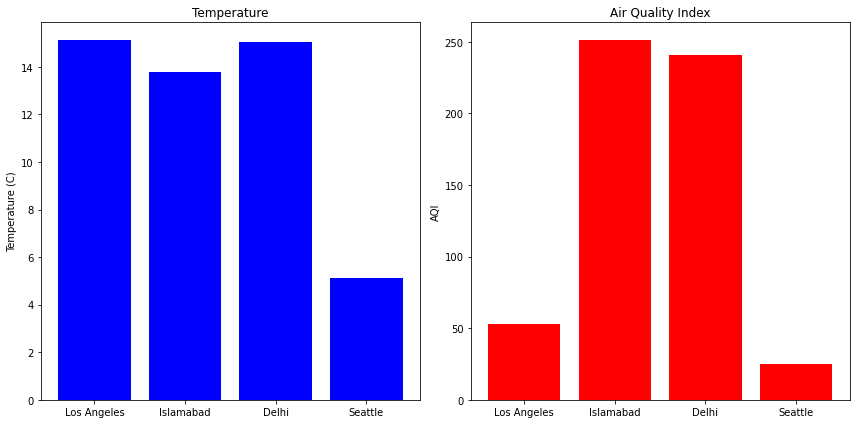

In [76]:
#visualization: plotting temperature and AQI side-by-side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(combined_df['City'], combined_df['Temperature'], color='blue')
plt.title('Temperature')
plt.ylabel('Temperature (C)')

plt.subplot(1, 2, 2)
plt.bar(combined_df['City'], combined_df['AQI'], color='red')
plt.title('Air Quality Index')
plt.ylabel('AQI')

plt.tight_layout()
plt.show()

There seems to be an inversely proportional relationship between temperature and AQI, and is most observable in Los Angeles and Seattle, although Islamabad and Delhi show the same relationship but it is more subtle. This could suggest that warmer air exacerbates air pollution, with potential factors being higher energy use, wildfires, or atmospheric conditions that trap pollutants. This pattern highlights the impact of climate and weather on urban air quality.
We can also see that cities like Seattle, knownn for its cleaner air, shows a significantly lower AQI than cities like Delhi, which suffers from chronic air pollution.

Understanding the relationship between weather conditions and air quality can help in formulating public health advisories and pollution control policies. For instance, on days with high temperatures and poor air quality, cities might issue health advisories to vulnerable populations like the elderly or those with respiratory issues.
